<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2차원 배열과 1차원 배열(벡터)에서의 차원**

다차원 배열에서 차원 = 축의 개수

1차원 배열(벡터)의 차원 = 원소 개수

**차원 축소(dimentiomality reduction)**

데이터를 가장 잘 나타내는 일부 특성을 선택해 데이터의 크기를 줄이고 지도 학습 모델의 성능을 향상

줄어든 차원에서 다시 원본차원으로 손실을 최대한 줄이면서 복원도 가능

대표 알고리즘 = 주성분 분석(principal component analysis)

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2nd = fruits.reshape(-1, 100*100)

--2023-12-11 08:50:01--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-12-11 08:50:01--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-12-11 08:50:02--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2nd)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):   # figsize 가 ratio 매개변수에 비례해 커짐, 기본값 1
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

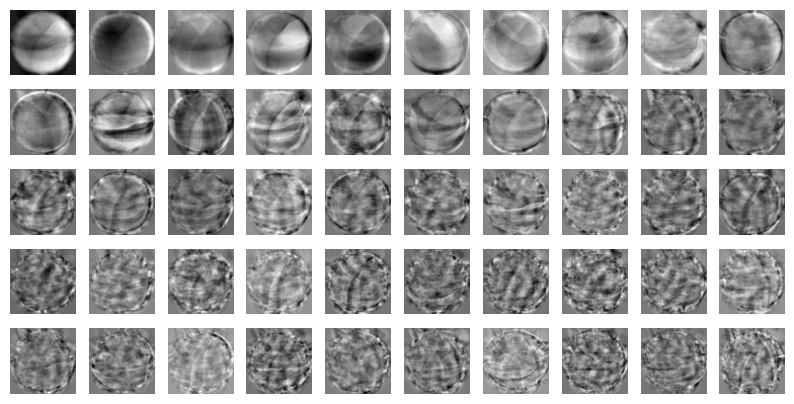

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
print(fruits_2nd.shape)

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2nd)
print(fruits_pca.shape)  # 특성이 10000개에서 50개로 줄어듦

(300, 50)


In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)   # 이전 특성 복구
print(fruits_inverse.shape)

(300, 10000)


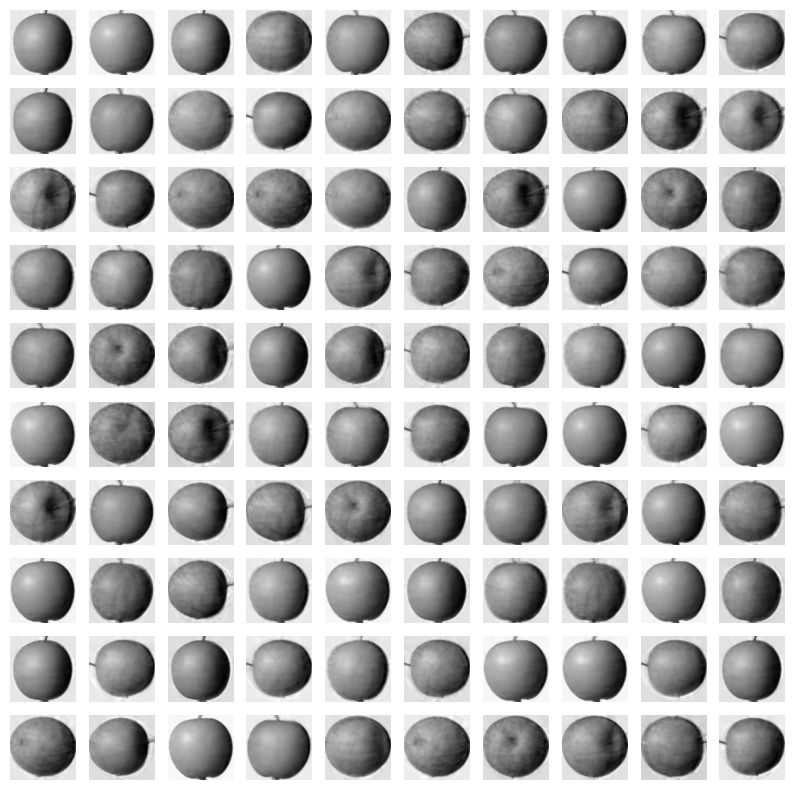

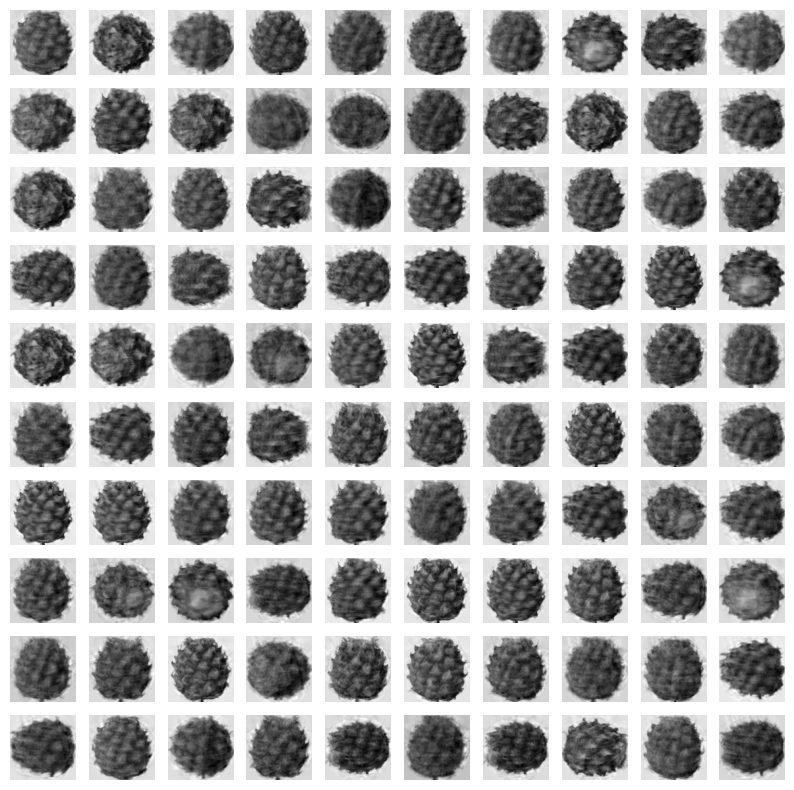

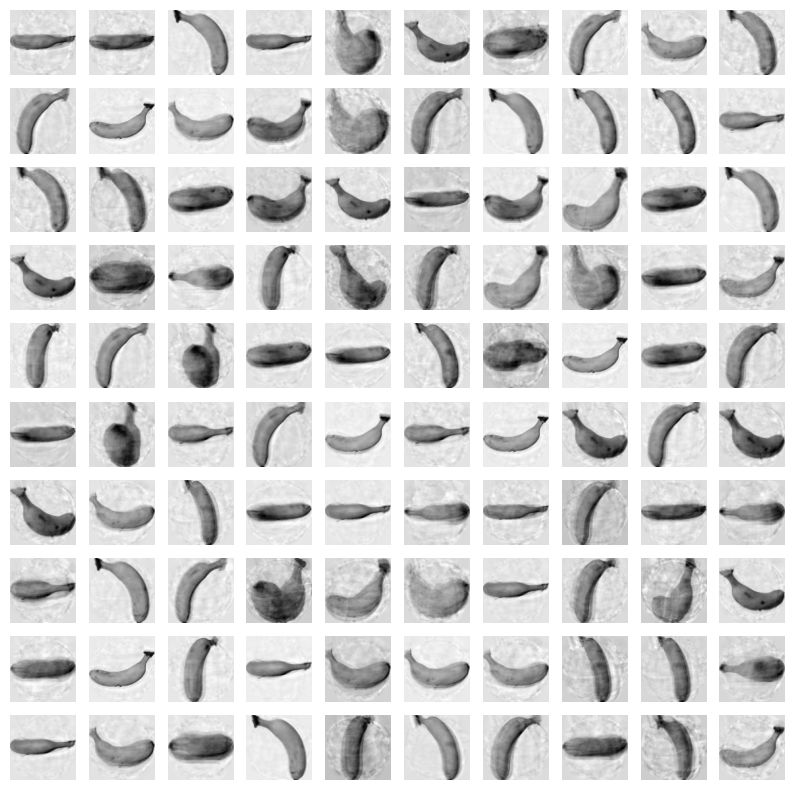

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start + 100])
  print('\n')

**설명된 분산(explained variance)**

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

첫 번째 주성분의 설명된 분산이 가장 크다

In [12]:
print(np.sum(pca.explained_variance_ratio_)) # 설명 분산 합

0.9215820258368886


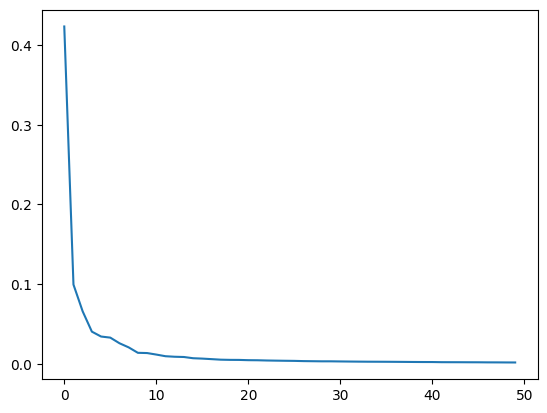

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

처음 10개의 주성분이 분산 대부분을 설명

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

In [15]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2nd, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.8379032135009765


In [16]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.048361921310424806


50개 특성만 사용했는데도 높은 정확도

pca로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델 훈련 속도를 높일 수 있음

In [17]:
pca = PCA(n_components = 0.5)   # 주성분 개수 대신 분산의 비율 입력 가능 / 0 ~ 1 사이값
pca.fit(fruits_2nd)
print(pca.n_components_)   # 2개의 주성분을 이용하면 분산 50%를 설명할 수 있음

2


In [18]:
fruits_pca = pca.transform(fruits_2nd)
print(fruits_pca.shape)

(300, 2)


In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9933333333333334
0.09882678985595703


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


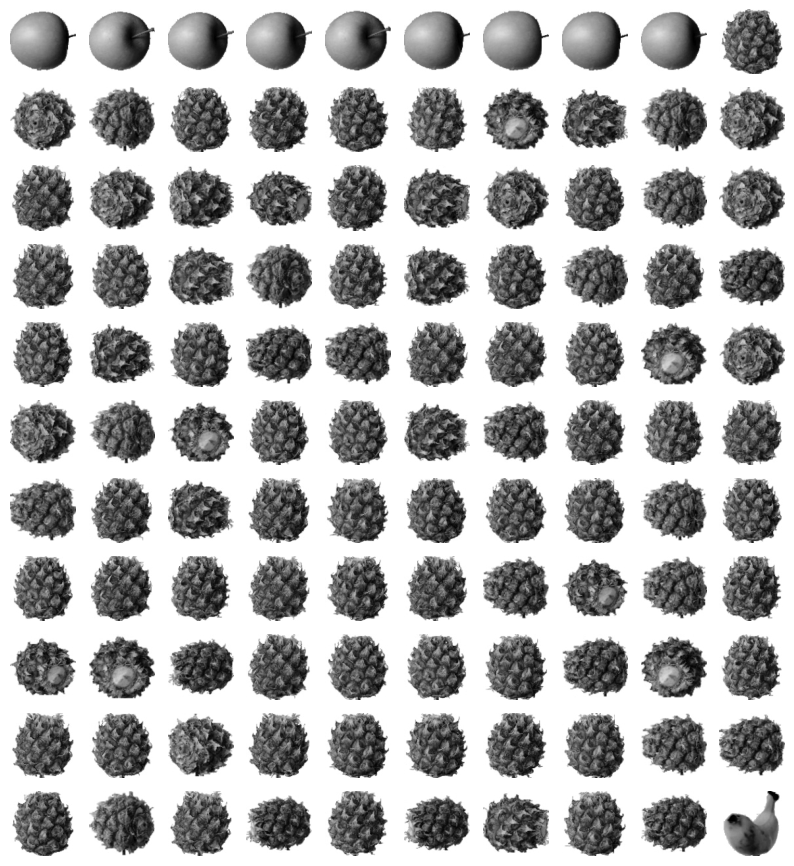

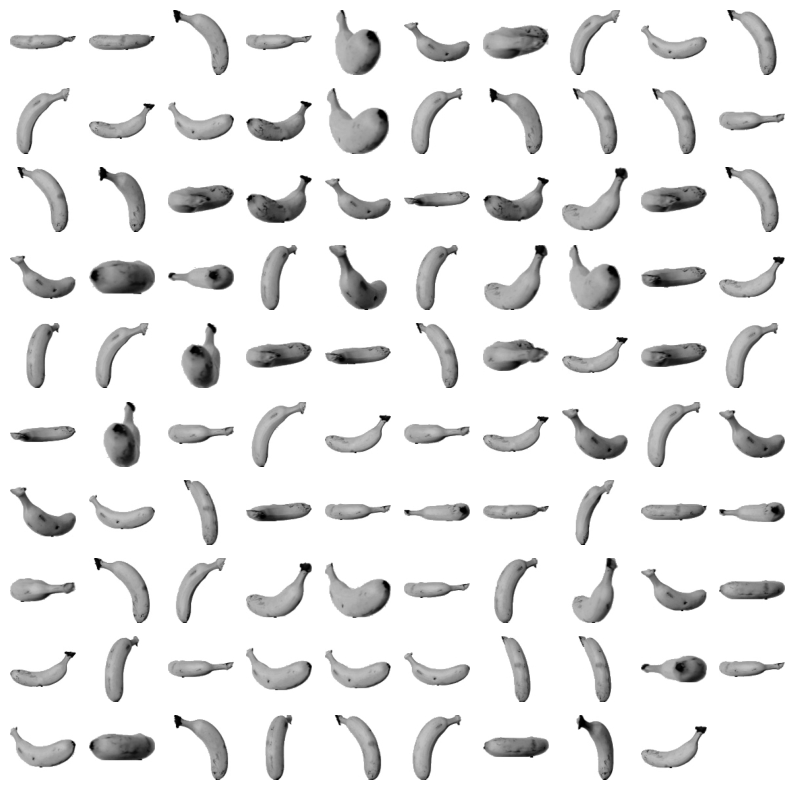

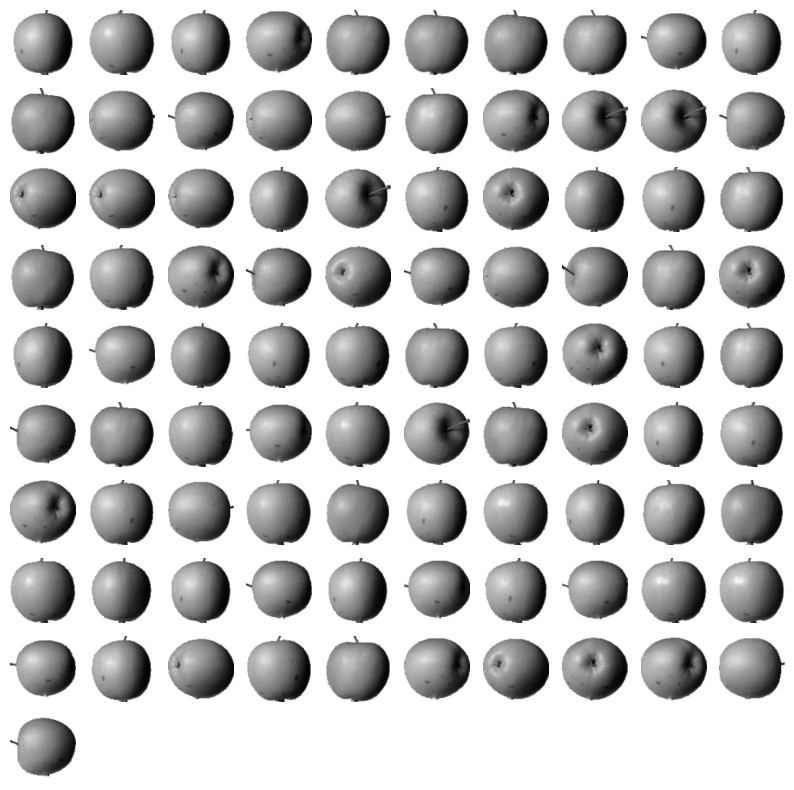

In [21]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

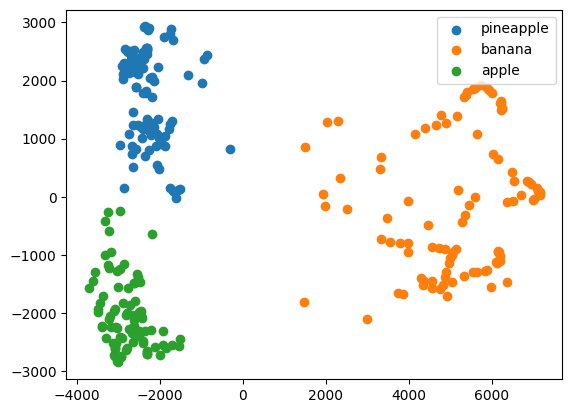

In [23]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

차원을 줄여서 특성이 적어졌기 때문에 시각화할 때 좋